# DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR INSURANCE CLAIMS DATA

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import where as IF

In [ ]:
1. Import claims_data.csv and cust_data.csv which is provided to you and 
combine the two datasets appropriately to create a 360-degree view of 
the data. Use the same for the subsequent questions

In [4]:
claims= pd.read_csv("C:/Users/Lenovo/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv")

demo= pd.read_csv("C:/Users/Lenovo/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")

claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [5]:
demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [6]:
table = pd.merge(right= claims, left = demo, right_on= 'customer_id', left_on= 'CUST_ID', how= 'outer'  )
table

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaN,NaN,NaN,97727122.0,35951012.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaN,NaN,NaN,NaN,10247193.0,14818669.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaN,NaN,NaN,NaN,79807493.0,85322831.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaN,NaN,NaN,NaN,69299345.0,73449366.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [7]:
 table.drop(columns= ['customer_id'], inplace= True)


In [30]:
table

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaN,NaN,NaN,97727122.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaN,NaN,NaN,NaN,10247193.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaN,NaN,NaN,NaN,79807493.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaN,NaN,NaN,NaN,69299345.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [ ]:
2. Perform a data audit for the datatypes and find out if there are any 
mismatch within the current datatypes of the columns and their 
business significance

In [8]:
table.dtypes

CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [9]:
table['DateOfBirth'] = pd.to_datetime(table.DateOfBirth, format= '%d-%b-%y')

table.loc[(table.DateOfBirth.dt.year > 2020),"DateOfBirth"]= table[table.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

table['Contact']= pd.to_numeric(table.Contact.str.replace('-',''), downcast= 'float')

table

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [ ]:
3. Convert the column claim_amount to numeric. Use the appropriate 
modules/attributes to remove the $ sign

In [10]:
table['claim_date'] = pd.to_datetime(table.claim_date, format= '%m/%d/%Y')
table['claim_amount']= pd.to_numeric(table.claim_amount.str.replace('$',''),downcast='float')

table



C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11016/2649998805.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  table['claim_amount']= pd.to_numeric(table.claim_amount.str.replace('$',''),downcast='float')


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No


In [ ]:
4. Of all the injury claims, some of them have gone unreported with the 
police. Create an alert flag (1,0) for all such claims

In [11]:
table['flag']= IF(table.police_report=='No',0,
                 IF(table.police_report=='Yes',1,np.nan))
                  
table

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0.0
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0.0
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,0.0
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN


In [ ]:
5. One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID 
should remain unique. 
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column

In [12]:
table= table.groupby('CUST_ID').first().reset_index(drop= True)

In [ ]:
6. Check for missing values and impute the missing values with an 
appropriate value. (mean for continuous and mode for categorical)

In [13]:
cat_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","flag"]
con_col = ["claim_amount"]

In [14]:
for col in cat_col:
    table[col] = table[col].fillna(table[col].mode()[0])
table[con_col] = table[con_col].fillna(table[con_col].mean())
table.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0


In [ ]:
7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60


In [15]:
table['Age']= round((table.claim_date- table.DateOfBirth).apply(lambda x:x.days)/365.25,2)

In [16]:
table['Age_Group']= IF(table.Age<18, 'Children',
                      IF(table.Age<30, 'Youth',
                        IF(table.Age<60, 'Adult',
                          IF(table.Age<100, 'Senior', 'NaN'))))

table["Age_Group"] = table["Age_Group"].fillna(table["Age_Group"].mode())
table

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_Group
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0.0,39.88,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.29,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0,29.22,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0,46.59,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0,37.96,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,1965-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0.0,53.44,Adult
1081,Female,1966-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,1.0,51.55,Adult
1082,Female,1963-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0.0,54.38,Adult
1083,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0.0,22.43,Youth


In [ ]:
8. What is the average amount claimed by the customers from various 
segments?

In [17]:
table.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12755.710938
Platinum,12370.138672
Silver,12271.163086


In [ ]:
9. What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.

In [18]:
table.loc[table.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_")

incident_cause
total_Crime                  724462.5
total_Driver error          3264286.0
total_Natural causes        1312706.0
total_Other causes          3725038.5
total_Other driver error    3318806.5
Name: claim_amount, dtype: float32

In [ ]:
10. How many adults from TX, DE and AK claimed insurance for driver 
related issues and causes? 

In [19]:
table.loc[(table.incident_cause.str.lower().str.contains("driver") 
             & ((table.State == "TX") | (table.State == "DE") | (table.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

In [ ]:
11. Draw a pie chart between the aggregated value of claim amount based 
on gender and segment. Represent the claim amount as a percentage on
the pie chart

In [20]:
T1= table.groupby(by=['gender','Segment'])['claim_amount'].sum().reset_index()
T1

,gender,Segment,claim_amount
0,Female,Gold,2122234.0
1,Female,Platinum,2381974.0
2,Female,Silver,1935970.0
3,Male,Gold,2622890.5
4,Male,Platinum,2120756.5
5,Male,Silver,2346666.0


In [21]:
data= T1.pivot(index= 'gender', columns= 'Segment', values= 'claim_amount')
data

Segment,Gold,Platinum,Silver
gender,,,
Female,2122234.0,2381974.0,1935970.0
Male,2622890.5,2120756.5,2346666.0


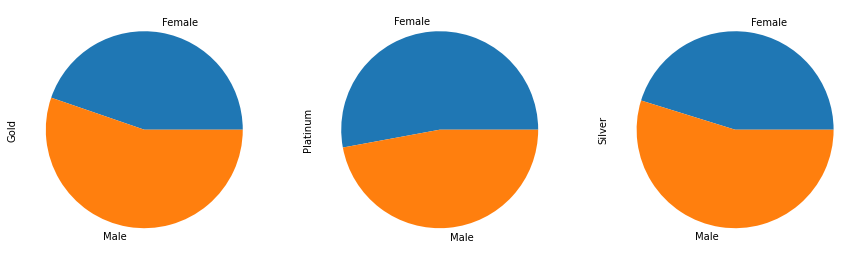

In [22]:
data.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))

plt.show()

In [ ]:
12. Among males and females, which gender had claimed the most for any 
type of driver related issues? E.g. This metric can be compared using a 
bar chart

In [23]:
T2= table.loc[(table.incident_cause.str.lower().str.contains('driver'))].groupby(by='gender')[['gender']].count().add_prefix('Count of ').reset_index()
T2

,gender,Count of gender
0,Female,221
1,Male,280


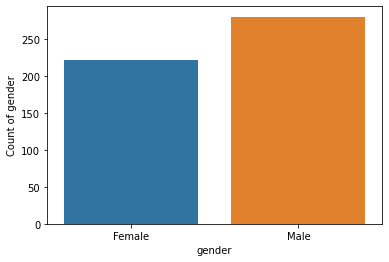

In [81]:
sns.barplot(x='gender', y= 'Count of gender',data= T2)
plt.show()

In [ ]:
13. Which age group had the maximum fraudulent policy claims? Visualize 
it on a bar chart

In [24]:
table["Frauds"]= np.where(table.fraudulent == "Yes",1,0)

In [25]:
AgeGroup_max_frauds= table.groupby(["Age_Group"])["Frauds"].sum().reset_index()
AgeGroup_max_frauds

,Age_Group,Frauds
0,Adult,173
1,Children,1
2,NaN,0
3,Youth,73


[]

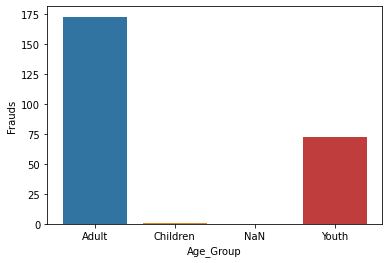

In [26]:
sns.barplot(x= "Age_Group", y="Frauds", data=AgeGroup_max_frauds )
plt.plot()

In [ ]:
14. Visualize the monthly trend of the total amount that has been claimed 
by the customers. Ensure that on the “month” axis, the month is in a 
chronological order not alphabetical order. 

In [27]:
table['claim_month']= pd.to_datetime(table['claim_date'])
table['claim_month']=table['claim_month'].dt.month


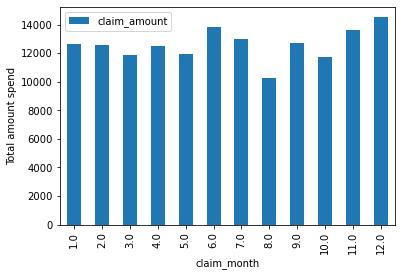

In [28]:
pd.pivot_table(table,index="claim_month",values="claim_amount").plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()


In [ ]:
15. What is the average claim amount for gender and age categories and 
suitably represent the above using a facetted bar chart, one facet that 
represents fraudulent claims and the other for non-fraudulent claims.

In [30]:
Fraud_Amt_Gender=table.loc[(table.fraudulent=='Yes')].groupby(by=['Age_Group','gender'])[['claim_amount']].mean().add_prefix('Fraud_')

Non_Fraud_Amt_Gender= table.loc[(table.fraudulent=='No')].groupby(by=['Age_Group','gender'])[['claim_amount']].mean().add_prefix('Non_Fraud_')

In [31]:
Claims_age_gender=round(pd.merge(Fraud_Amt_Gender,Non_Fraud_Amt_Gender, on=["gender","Age_Group"]),2)
Claims_age_gender

Fraud_claim_amount  Non_Fraud_claim_amount
gender Age_Group                                            
Female Adult            12462.080078            12494.320312
Male   Adult            17062.199219            12091.990234
       Children         32407.000000            18316.000000
Female Youth             7599.120117            12300.639648
Male   Youth            10096.429688            12193.259766

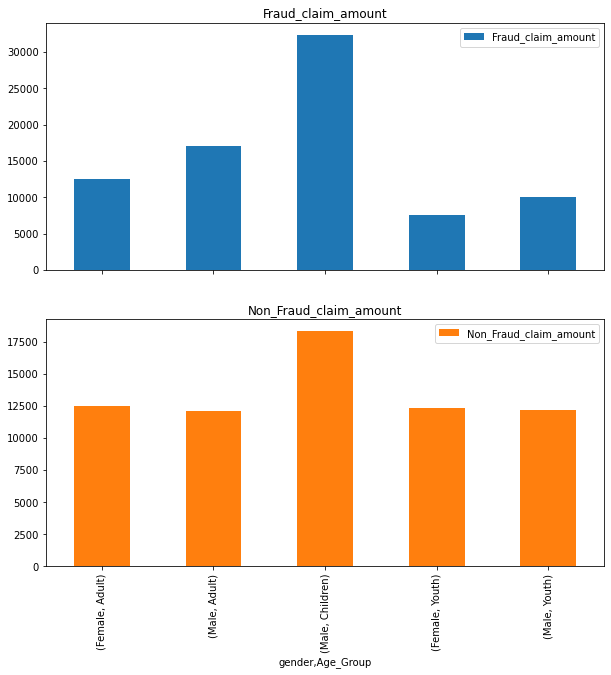

In [32]:
Claims_age_gender.plot(kind= 'bar',subplots =True, legend= True, figsize=(10,10))

plt.show()

In [ ]:
16. Is there any similarity in the amount claimed by males and females?

In [33]:
claim_male = table['claim_amount'].loc[table['gender']=="Male"]
claim_female = table['claim_amount'].loc[table['gender']=="Female"]

print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12821.54296875
The average amount claimed by females is 12105.59765625


In [34]:
import scipy.stats as stats

In [ ]:
Ho: u1=u2
Ha: u1<>u2
CI: 95%
p-value: 0.05

In [35]:
stats.ttest_ind(claim_male, claim_female)

Ttest_indResult(statistic=0.884820659484728, pvalue=0.3764497634508194)

In [ ]:
# As the significance value of t test is greater than 0.05 we can safely conclude that there is a similarity in amount claimed by males and females.

In [ ]:
17. Is there any relationship between age category and segment?

In [ ]:
Ho: There is no relationship between age category and segment
Ha: There is a relationship between age category and segment
CI: 95%
p-value: 0.05

In [41]:
table_1 = pd.crosstab(index=table.Age_Group, columns= table.Segment)
table_1

Segment,Gold,Platinum,Silver
Age_Group,,,
Adult,262,241,241
Children,4,4,0
NaN,1,3,3
Youth,105,116,105


In [42]:
stats.chi2_contingency(table_1)

(6.349304779939779,
 0.3852189604208801,
 6,
 array([[255.08571429, 249.6       , 239.31428571],
        [  2.74285714,   2.68387097,   2.57327189],
        [  2.4       ,   2.3483871 ,   2.2516129 ],
        [111.77142857, 109.36774194, 104.86082949]]))

In [ ]:
#Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment

In [ ]:
18. The current year has shown a significant rise in claim amounts as 
compared to 2016-17 fiscal average which was $10,000.

In [ ]:
Ho: u<=10000
Ha: u>10000
CI: 95%
p-value: 0.05

In [43]:
stats.ttest_1samp(table.claim_amount,10000)

Ttest_1sampResult(statistic=6.108224068635727, pvalue=1.4021796078727402e-09)

In [ ]:
#Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no rise in claim amounts as compared to 2016-17 fiscal year

In [ ]:
19. Is there any difference between age groups and insurance claims?

In [61]:
age_group_1 = table.loc[table.Age_Group =="Youth",'total_policy_claims']
age_group_2 = table.loc[table.Age_Group=="Adult",'total_policy_claims']
age_group_3 = table.loc[table.Age_Group=="Children",'total_policy_claims']


Ho: u1=u2=u3
Ha: u1<>u2<>u3
CI: 95%
p-value: 0.05

In [67]:
stats.f_oneway(age_group_1,age_group_2, age_group_3)

F_onewayResult(statistic=nan, pvalue=nan)

In [ ]:
20. Is there any relationship between total number of policy claims and the 
claimed amount?

In [68]:
table['total_policy_claims'] = pd.to_numeric(table['total_policy_claims'])


In [ ]:
Ho: r=0
Ha: r<>0
CI: 95%
p-value: 0.05

In [72]:
table.total_policy_claims.corr(other= table.claim_amount)


-0.014369036618012743

In [ ]:
# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.